# K Nearest Neighbours

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

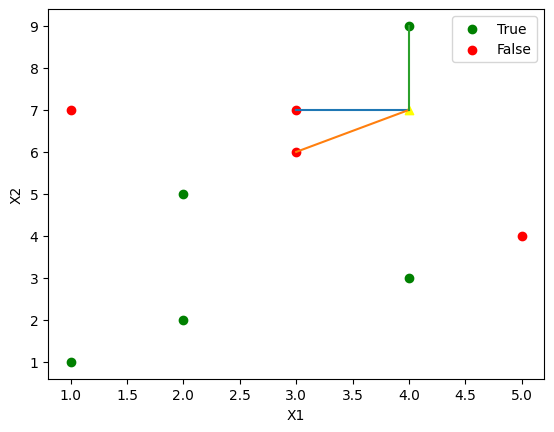

In [16]:
X1 = [1,2,3,4,5,4,1,2,3]
X2 = [1,2,7,9,4,3,7,5,6]
Y = [True,True,False,True,False,True,False,True,False]
X_true = []
X_false = []
for i in range(len(X1)):
    if(Y[i]==True):
        X_true.append([X1[i],X2[i]])
    else:
        X_false.append([X1[i],X2[i]])
x_t = [p[0] for p in X_true]
y_t = [p[1] for p in X_true]

x_f = [p[0] for p in X_false]
y_f = [p[1] for p in X_false]

# Plot
plt.scatter(x_t, y_t, color="green", label="True")
plt.scatter(x_f, y_f, color="red", label="False")
random_point = [4,7]
plt.scatter(random_point[0],random_point[1],color="yellow",marker="^")
plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")

def plot_k_nearest(all_points, point, k):
    distances = []

    # Compute distance from point to every other point
    for p in all_points:
        dist = np.sqrt((p[0] - point[0])**2 + (p[1] - point[1])**2)
        distances.append((dist, p))

    # Sort by distance
    distances.sort(key=lambda x: x[0])

    # Take k nearest
    k_nearest = distances[:k]

    # Plot lines
    for _, p in k_nearest:
        plt.plot(
            [point[0], p[0]],
            [point[1], p[1]],
            linestyle="-"
        )

    return k_nearest
# Combine all points
all_points = X_true + X_false

# Query point
random_point = [4, 7]

# Plot k nearest neighbors
k = 3
plot_k_nearest(all_points, random_point, k)

plt.show()


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"Social_Network_Ads.csv")
data.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
308,15596761,Male,36,125000,1
111,15660200,Female,37,71000,0
259,15815236,Female,45,131000,1
289,15713912,Female,37,78000,1
332,15769902,Male,42,65000,0


In [25]:
X = data.iloc[:,2:4].values
y = data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


(400, 2)

In [33]:
# Standard Scaling is required and non - negotiable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [41]:
k = np.sqrt(X_train.shape[0])
k

np.float64(17.88854381999832)

In [47]:
k = 18
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [50]:
y_pred.shape==y_test.shape

True

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

0.925


array([[47,  5],
       [ 1, 27]])

In [54]:
# 2nd Method Trial and Error
accuracy = []
for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [55]:
len(accuracy)

25

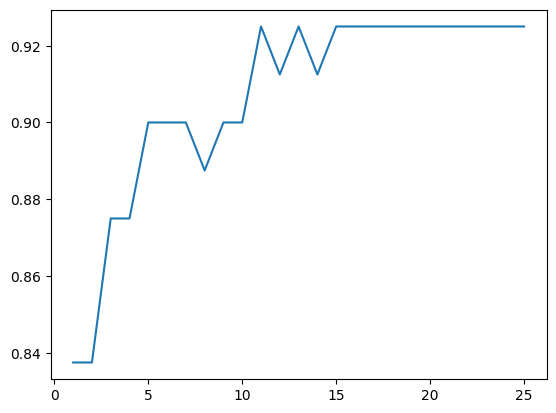

In [56]:
plt.plot(range(1,26),accuracy)

In [57]:
# Maximum at 15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [58]:
accuracy_score(y_pred,y_test)

0.925

In [67]:
def predict_output():
    age=int(input("Enter the Age:"))
    salary = int(input("Enter the Salary"))
    X_new = np.array([[age],[salary]]).reshape(1,2)
    X_new = scaler.transform(X_new)
    if(knn.predict(X_new)[0]==0):
        return "Will not Purchase"
    else:
        return "Will Purchase"

In [68]:
predict_output()

'Will Purchase'

In [ ]:
# Few Observations

# 1. Hyperparameters
# n_neighbors --> No of k

# 2. Methods to choose for k
# 1. Method 1--> sqrt
# 2. Method 2--> Hit and Run

In [74]:
# MESHGRID
x = np.linspace(-4,4,9)
y = np.linspace(-5,5,11)
x_1,y_1 = np.meshgrid(x,y)
print(x_1.shape,y_1.shape)

(11, 9) (11, 9)


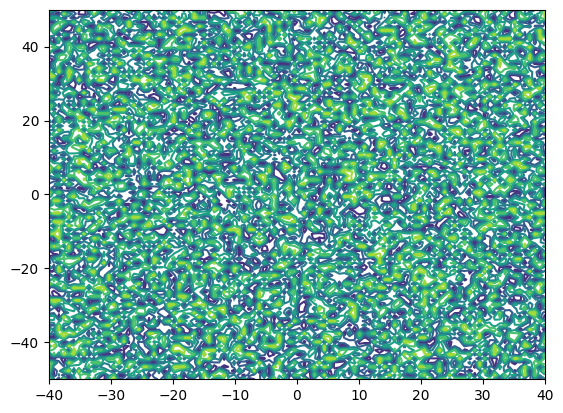

In [81]:
x = np.linspace(-40,40,100)
y = np.linspace(-50,50,90)
XX,YY = np.meshgrid(x,y)
Z = np.random.random((90,100))
plt.contour(XX,YY,Z,cmap="viridis")

# Plotting Decision Boundary for KNN

In [88]:
# Creating a Meshgrid
a = np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b = np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)

In [89]:
print(a.shape,b.shape)

(592,) (607,)


In [90]:
XX,YY = np.meshgrid(a,b)

In [ ]:
YY.shape

(607, 592)

In [99]:
res = np.array([XX.ravel(),YY.ravel()]).T
res.shape

(359344, 2)

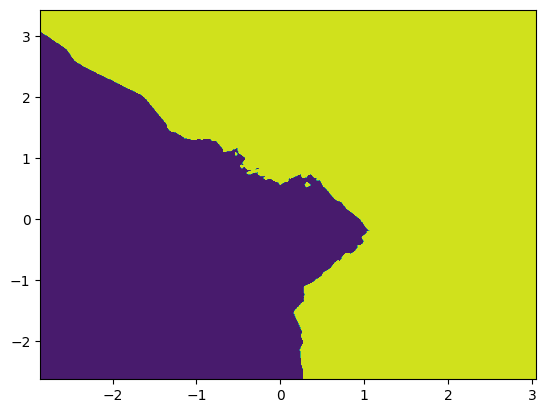

In [106]:
# Classifying every point on Meshgrid
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
ans = knn.predict(res)
plt.contourf(XX,YY,ans.reshape(XX.shape))

In [105]:
ans.shape

(359344,)

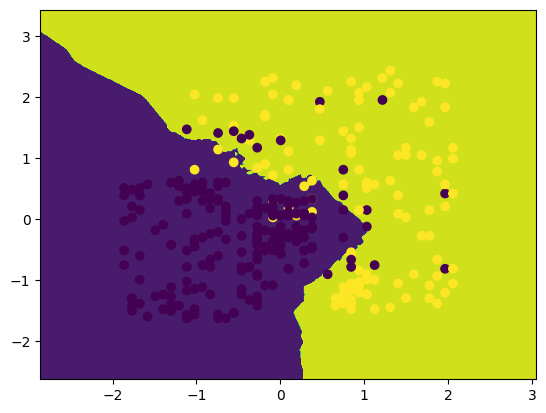

In [107]:
# Plotting All Training Data on the Plot
plt.contourf(XX,YY,ans.reshape(XX.shape))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [108]:
# Effect of K on Decision Boundary
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.925

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[47,  5],
       [ 1, 27]])

In [110]:
# Effect of K on Training Error Rate and Validation Error Rate
error_train = []
error_test = []

for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    x = confusion_matrix(y_train,knn.predict(X_train))
    y = confusion_matrix(y_test,knn.predict(X_test))
    error_train.append((x[0][1]+x[1][0])/x.sum())
    error_test.append((x[0][1]+x[1][0])/y.sum())


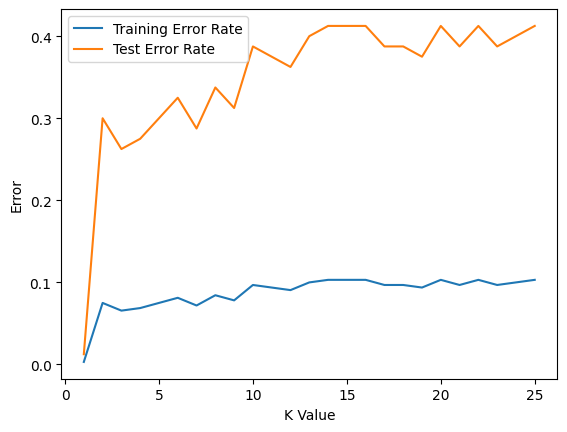

In [111]:
plt.plot(range(1,26),error_train,label="Training Error Rate")
plt.plot(range(1,26),error_test,label = "Test Error Rate")
plt.xlabel("K Value")
plt.ylabel("Error")
plt.legend()

# Building our own KNN Classifier

In [119]:
data = pd.read_csv(r"Social_Network_Ads.csv")
X = data.iloc[:,2:4].values
y = data.iloc[:,-1].values

In [120]:
print(X.shape,y.shape)

(400, 2) (400,)


In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [122]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [134]:
import operator
from collections import Counter
# Class Definition
class KNearestNeighbors:
    def __init__(self,k):
        self.k = k
    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
        print("Training Done")
    def predict(self,X_test):
        distance = {}
        counter = 1
        for i in self.X_train:
            distance[counter]=((X_test[0][0]-i[0])**2 + (X_test[0][1]-i[1])**2)**0.5
            counter+=1
            distance = sorted(distance.items(),key=operator.itemgetter(1))
            return self.classify(distance=distance[:self.k])
    def classify(self,distance):
        label=[]
        for i in distance:
            label.append(self.y_train[i[0]])
        return Counter(label).most_common()[0][0]


In [135]:
knn = KNearestNeighbors(k=5)
knn.fit(X_train,y_train)

Training Done


In [136]:
def predict_new():
    age=int(input("Enter the age"))
    salary=int(input("Enter the salary"))
    X_new=np.array([[age],[salary]]).reshape(1,2)

    X_new=scaler.transform(X_new)

    result=knn.predict(X_new)

    if result==0:
        print("Will not purchase")
    else:
        print("Will purchase")

predict_new()

Will not purchase
